In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [51]:
def raincloud(lst_a, lst_b):
    data_x = [lst_a, lst_b]

    fig, ax = plt.subplots(figsize=(16, 8))

    # Create a list of colors for the boxplots based on the number of features you have
    boxplots_colors = ['tab:green', 'tab:green']
    #boxplots_colors = ['yellowgreen', 'olivedrab']

    # Boxplot data
    bp = ax.boxplot(data_x, patch_artist = True, vert = False)

    # Change to the desired color and add transparency
    for patch, color in zip(bp['boxes'], boxplots_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)

    # Create a list of colors for the violin plots based on the number of features you have
    violin_colors = ['tab:blue', 'tab:orange']
    # violin_colors = ['thistle', 'orchid']

    # Violinplot data
    vp = ax.violinplot(data_x, points=500, 
                showmeans=False, showextrema=False, showmedians=False, vert=False)

    for idx, b in enumerate(vp['bodies']):
        # Get the center of the plot
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # Modify it so we only see the upper half of the violin plot
        b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
        # Change to the desired color
        b.set_color(violin_colors[idx])

    # Create a list of colors for the scatter plots based on the number of features you have
    scatter_colors = ['tab:blue', 'tab:orange']

    # Scatterplot data
    for idx, features in enumerate(data_x):
        # Add jitter effect so the features do not overlap on the y-axis
        y = np.full(len(features), idx + .8)
        idxs = np.arange(len(y))
        out = y.astype(float)
        out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
        y = out
        plt.scatter(features, y, s=5, c=scatter_colors[idx])

    plt.yticks(np.arange(1,3,1), ['MoLPC', 'AFv2.3'])  # Set text labels.
    plt.xlabel('tmscore')
    plt.title("AFv2.3 vs MoLPC")
    plt.show()

In [52]:
molpc_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/molpc_tmscores/*"
mcts_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/mcts_v2_tmscores/*"
mcts2_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/mcts_v2.2_tmscores/*"
af_dir = "/home/hychimaa/workspace/molpc_imp/result/tmscores/afv2.3_tmscores/*"

In [6]:
lst = []

for p in glob.glob(af_dir):
    with open(p) as f:
        lines = f.readlines()
        score = lines[1].split("\t")[2]
        lst.append(f'{os.path.basename(p)[0:4]}, {score}')

In [7]:
with open('mmalign_af.csv', 'w') as f:
    for line in lst:
        f.write(f"{line}\n")

rain cloud plot

In [8]:
imp = pd.read_csv('mmalign_imp.csv', header=None)
molpc = pd.read_csv('mmalign_molpc.csv', header=None)
mcts_v2 = pd.read_csv('mmalign_mcts_v2.csv', header=None)
mcts_v2_2 = pd.read_csv('mmalign_mcts_v2.2.csv', header=None)
af = pd.read_csv('mmalign_af.csv', header=None)

In [9]:
imp_tmscores = imp[1].to_list()
molpc_tmscores = molpc[1].to_list()
mcts_tmscores = mcts_v2[1].to_list()
mcts2_tmscores = mcts_v2_2[1].to_list()
af_tmscores = af[1].to_list()

In [10]:
comb = pd.merge(molpc, af, on=0, how='outer')
comb2 = comb.dropna()
comb2

,0,1_x,1_y
1,6UIW,0.6108,0.9309
2,5K2M,0.4918,0.4844
3,1G63,0.2510,0.9949
4,3ZIA,0.5011,0.6508
5,2P1B,0.4917,0.4351
...,...,...,...
161,3K6C,0.8869,0.9947
162,1L0L,0.3168,0.9557
163,6MRT,0.1869,0.6231
166,5ODC,0.8024,0.9841


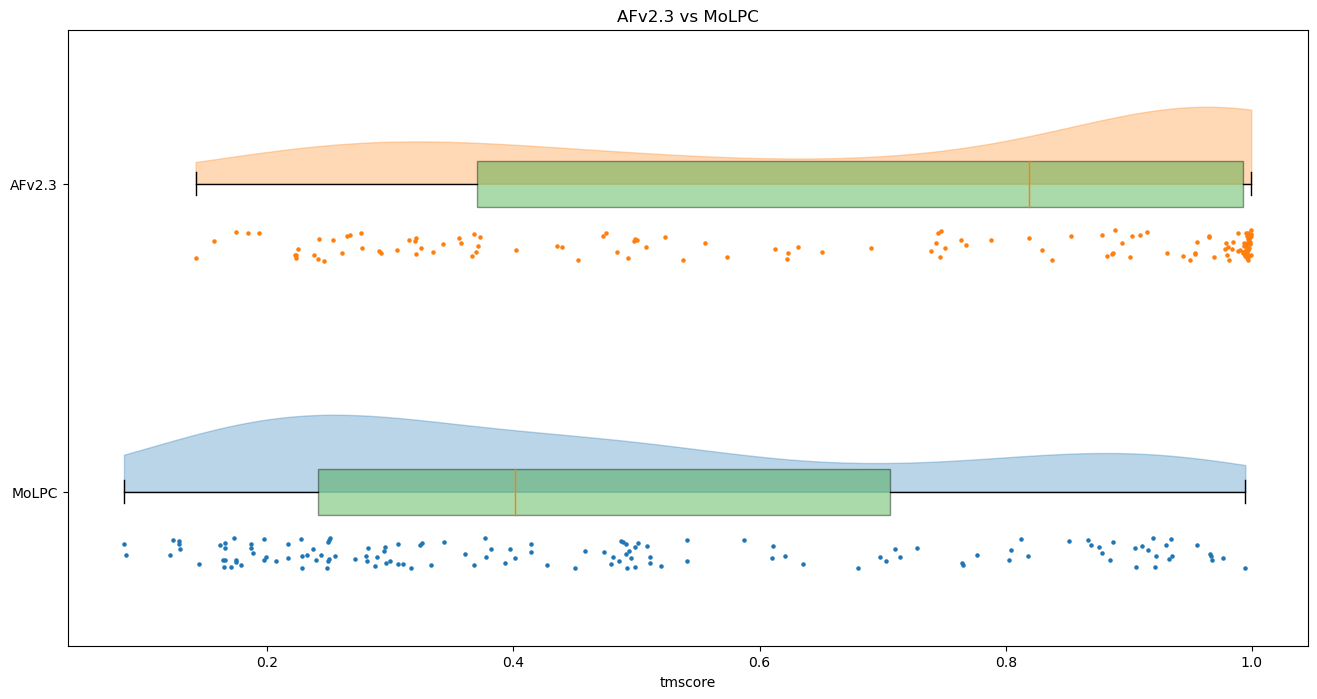

In [53]:
raincloud(comb2['1_x'].to_list(), comb2['1_y'].to_list())

Text(0, 0.5, 'AF')

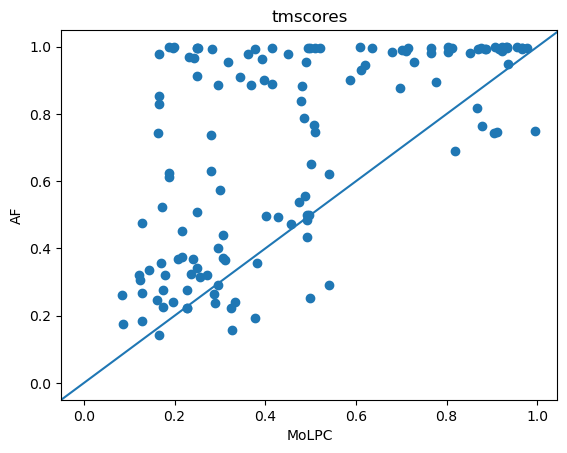

In [15]:
plt.scatter(comb2['1_x'].to_list(), comb2['1_y'].to_list())
plt.axline((0, 0), slope=1)
plt.title("tmscores")
plt.xlabel('MoLPC')
plt.ylabel('AF')

In [24]:
comb2.to_csv('af_tmscores.csv', index=False)

In [25]:
df = pd.read_csv('af_tmscores.csv')
df

,0,1_x,1_y
0,6UIW,0.6108,0.9309
1,5K2M,0.4918,0.4844
2,1G63,0.2510,0.9949
3,3ZIA,0.5011,0.6508
4,2P1B,0.4917,0.4351
...,...,...,...
130,3K6C,0.8869,0.9947
131,1L0L,0.3168,0.9557
132,6MRT,0.1869,0.6231
133,5ODC,0.8024,0.9841


In [30]:
df = df.drop(df.columns[[0]], axis=1)

In [27]:
df.sort_values(by='0').to_csv('tmscores.csv', index=None)
df

,0,1_x,1_y
0,6UIW,0.6108,0.9309
1,5K2M,0.4918,0.4844
2,1G63,0.2510,0.9949
3,3ZIA,0.5011,0.6508
4,2P1B,0.4917,0.4351
...,...,...,...
130,3K6C,0.8869,0.9947
131,1L0L,0.3168,0.9557
132,6MRT,0.1869,0.6231
133,5ODC,0.8024,0.9841


In [30]:
df['diff'] = df['1_y'] - df['1_x']
df

,0,1_x,1_y,diff
0,6UIW,0.6108,0.9309,0.3201
1,5K2M,0.4918,0.4844,-0.0074
2,1G63,0.2510,0.9949,0.7439
3,3ZIA,0.5011,0.6508,0.1497
4,2P1B,0.4917,0.4351,-0.0566
...,...,...,...,...
130,3K6C,0.8869,0.9947,0.1078
131,1L0L,0.3168,0.9557,0.6389
132,6MRT,0.1869,0.6231,0.4362
133,5ODC,0.8024,0.9841,0.1817


In [38]:
df = df.sort_values(by='diff')
df.to_csv('af-molpc_diff.csv', index=False)